In [54]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

size = 50
xrange = 100
x = xrange * np.random.rand(size)
x

array([ 3.32444191, 10.6365246 , 31.95476481, 73.84656973, 30.6516202 ,
       65.11913635,  5.92622879, 30.36235601, 37.71995745, 73.07449969,
       69.06827043, 21.21849288,  7.99670572, 74.63328274, 44.35801692,
       79.89706521, 65.43421681, 56.17613599, 46.17911577, 62.93501767,
       95.40939877, 31.6488182 ,  0.6638405 , 56.36300206, 57.94096486,
       18.07038431,  9.81943206, 10.71427138, 30.22662814, 82.44531203,
       31.15322556, 28.99943862, 42.65774973, 46.31103488, 49.38138616,
       15.95767992, 26.80327059, 23.15796745, 35.01941509, 52.19451363,
       82.6065626 , 49.18792503, 79.10567374, 49.05269547, 33.42782526,
       87.11450393, 95.57916959, 64.55468023, 92.15592974, 96.97418177])

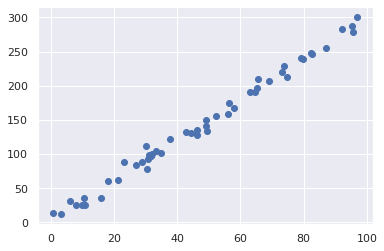

In [55]:
sigma = 7
epsilon = sigma * np.random.randn(size)
slope = 3
intercept = 2
y = slope * x + intercept + epsilon

plt.scatter(x,y)

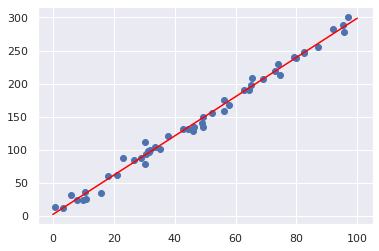

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x[:, np.newaxis], y)

# tworzy rowno odlegle punkty
x1 = np.linspace(0, xrange, 100)
y1 = model.predict(x1[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x1, y1, c='red')

In [57]:
model.coef_, model.intercept_

(array([2.96290879]), 2.4974274255619378)

In [58]:
import statsmodels.api as sm

# przejscie z afinicznego do addytywnego liniowego
x = sm.add_constant(x)  # dodanie kolumny jedynek do macierzy x
model = sm.OLS(y, x)  # standardowe najmniejsze kwadraty Ordinary Least Squares
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     5519.
Date:                Tue, 17 May 2022   Prob (F-statistic):           3.28e-51
Time:                        16:58:23   Log-Likelihood:                -171.62
No. Observations:                  50   AIC:                             347.2
Df Residuals:                      48   BIC:                             351.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4974      2.174      1.149      0.256      -1.874       6.869
x1             2.9629      0.040     74.289      0.000       2.883       3.043
==============================================================================
Omnibus:                        1.160   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                0.604
Skew:                           0.251   Prob(JB):                        0.739
Kurtosis:                       3.194   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sfa
from sklearn import metrics
import pandas as pd

advertising = pd.read_csv('advertising.csv', index_col=0)
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


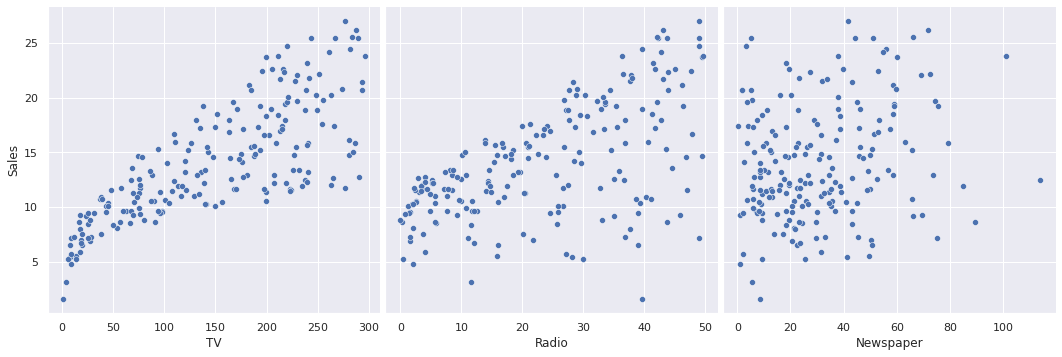

In [60]:
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], height=5)

<AxesSubplot:>

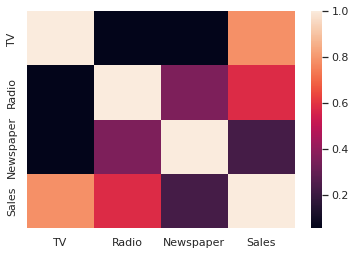

In [61]:
sns.heatmap(advertising.corr())

In [62]:
advertising.columns = ['tv', 'radio', 'newspaper', 'sales']
advertising.head()

,tv,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [63]:
x = pd.DataFrame(advertising.tv)
y = advertising.sales

lmScikit = LinearRegression()
lmScikit.fit(x, y)

lmScikit.coef_, lmScikit.intercept_

(array([0.04753664]), 7.032593549127693)

In [64]:
lmStats = sfa.ols(data=advertising, formula='sales ~ tv')
result = lmStats.fit()
result.params

Intercept    7.032594
tv           0.047537
dtype: float64

In [65]:
lmScikit.score(x, y), result.rsquared  # R wartosc

(0.611875050850071, 0.611875050850071)

In [66]:
cities = ['Warszawa', 'Krakow', 'Poznan']
advertising['city'] = [cities[int(np.random.random()*3)] for i in range(len(advertising))]
advertising.head()

,tv,radio,newspaper,sales,city
1,230.1,37.8,69.2,22.1,Warszawa
2,44.5,39.3,45.1,10.4,Krakow
3,17.2,45.9,69.3,9.3,Warszawa
4,151.5,41.3,58.5,18.5,Poznan
5,180.8,10.8,58.4,12.9,Krakow


In [67]:
cityDummies = pd.get_dummies(advertising.city, prefix='city')
cityDummies

,city_Krakow,city_Poznan,city_Warszawa
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,1,0,0
...,...,...,...
196,1,0,0
197,0,0,1
198,1,0,0
199,0,1,0


In [68]:
setColumns = ['tv', 'radio', 'newspaper', 'sales']
X = advertising[setColumns]
train, test = train_test_split(X)
train, test

(        tv  radio  newspaper  sales
 27   142.9   29.3       12.6   15.0
 6      8.7   48.9       75.0    7.2
 117  139.2   14.3       25.6   12.2
 80   116.0    7.7       23.1   11.0
 159   11.7   36.9       45.2    7.3
 ..     ...    ...        ...    ...
 162   85.7   35.8       49.3   13.3
 118   76.4    0.8       14.8    9.4
 25    62.3   12.6       18.3    9.7
 100  135.2   41.7       45.9   17.2
 87    76.3   27.5       16.0   12.0
 
 [150 rows x 4 columns],
         tv  radio  newspaper  sales
 38    74.7   49.4       45.7   14.7
 191   39.5   41.1        5.8   10.8
 45    25.1   25.7       43.3    8.5
 142  193.7   35.4       75.6   19.2
 180  165.6   10.0       17.6   12.6
 148  243.2   49.0       44.3   25.4
 173   19.6   20.1       17.0    7.6
 192   75.5   10.8        6.0    9.9
 64   102.7   29.6        8.4   14.0
 152  121.0    8.4       48.7   11.6
 56   198.9   49.4       60.0   23.7
 127    7.8   38.9       50.6    6.6
 73    26.8   33.0       19.3    8.8
 136   48.3

In [69]:
lmc = sfa.ols(data=train, formula='sales ~ tv + radio + newspaper').fit()
lmc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     410.7
Date:                Tue, 17 May 2022   Prob (F-statistic):           6.24e-71
Time:                        16:58:26   Log-Likelihood:                -292.14
No. Observations:                 150   AIC:                             592.3
Df Residuals:                     146   BIC:                             604.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0619      0.359      8.527      0.000       2.352       3.772
tv             0.0452      0.002     28.206      0.000       0.042       0.048
radio          0.1798      0.011     16.574      0.000       0.158       0.201
newspaper      0.0019      0.007      0.266      0.790      -0.012       0.016
==============================================================================
Omnibus:                       54.221   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.688
Skew:                          -1.474   Prob(JB):                     1.04e-31
Kurtosis:                       6.760   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
predc = lmc.predict(test.drop('sales', axis=1))
np.sqrt(metrics.mean_squared_error(predc, test['sales']))

1.608956201112946

In [71]:
cars = pd.read_csv('cars.csv')
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [72]:
cars = cars.drop('name', axis=1)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [73]:
cars_new_columns = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'mpg']
cars = cars.reindex(columns=cars_new_columns)
cars.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0


In [74]:
cars.sample(10)

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg
315,4,151.0,90,3003,20.1,80,1,24.3
180,4,121.0,115,2671,13.5,75,2,25.0
260,6,225.0,110,3620,18.7,78,1,18.6
17,6,200.0,85,2587,16.0,70,1,21.0
56,4,91.0,70,1955,20.5,71,1,26.0
110,4,108.0,94,2379,16.5,73,3,22.0
320,4,119.0,92,2434,15.0,80,3,37.0
58,4,97.5,80,2126,17.0,72,1,25.0
98,6,250.0,100,3278,18.0,73,1,16.0
105,8,360.0,170,4654,13.0,73,1,13.0


In [75]:
np.isnan(cars.horsepower.any())

False

In [76]:
print(cars.horsepower.unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [77]:
for col in cars.columns:
    novalue = cars[cars[col] == '?']
    if novalue.size > 0:
        print(col, novalue.value_counts().sum())

horsepower 5


In [78]:
for col in cars.columns:
    novalue = cars[cars[col] == 0]
    if novalue.size > 0:
        print(col, novalue.value_counts().sum())

In [79]:
for col in cars.columns:
    novalue = cars[cars[col] == '']
    if novalue.size > 0:
        print(col, novalue.value_counts().sum())

In [80]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     397 non-null    int64  
 1   displacement  397 non-null    float64
 2   horsepower    397 non-null    object 
 3   weight        397 non-null    int64  
 4   acceleration  397 non-null    float64
 5   year          397 non-null    int64  
 6   origin        397 non-null    int64  
 7   mpg           397 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 24.9+ KB


In [81]:
cars.shape[0]

397

In [82]:
cars = cars[cars.horsepower != '?']
cars.shape[0]

392

In [83]:
np.isnan(cars.any())

cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
mpg             False
dtype: bool

In [84]:
cars.cylinders = [int(c) for c in cars.cylinders]
cars.displacement = [int(c) for c in cars.displacement]
cars.horsepower = [int(c) for c in cars.horsepower]
cars.weight = [int(c) for c in cars.weight]
cars.acceleration = [float(c) for c in cars.acceleration]
cars.year = [int(c) for c in cars.year]
cars.origin = [int(c) for c in cars.origin]
cars.mpg = [float(c) for c in cars.mpg]

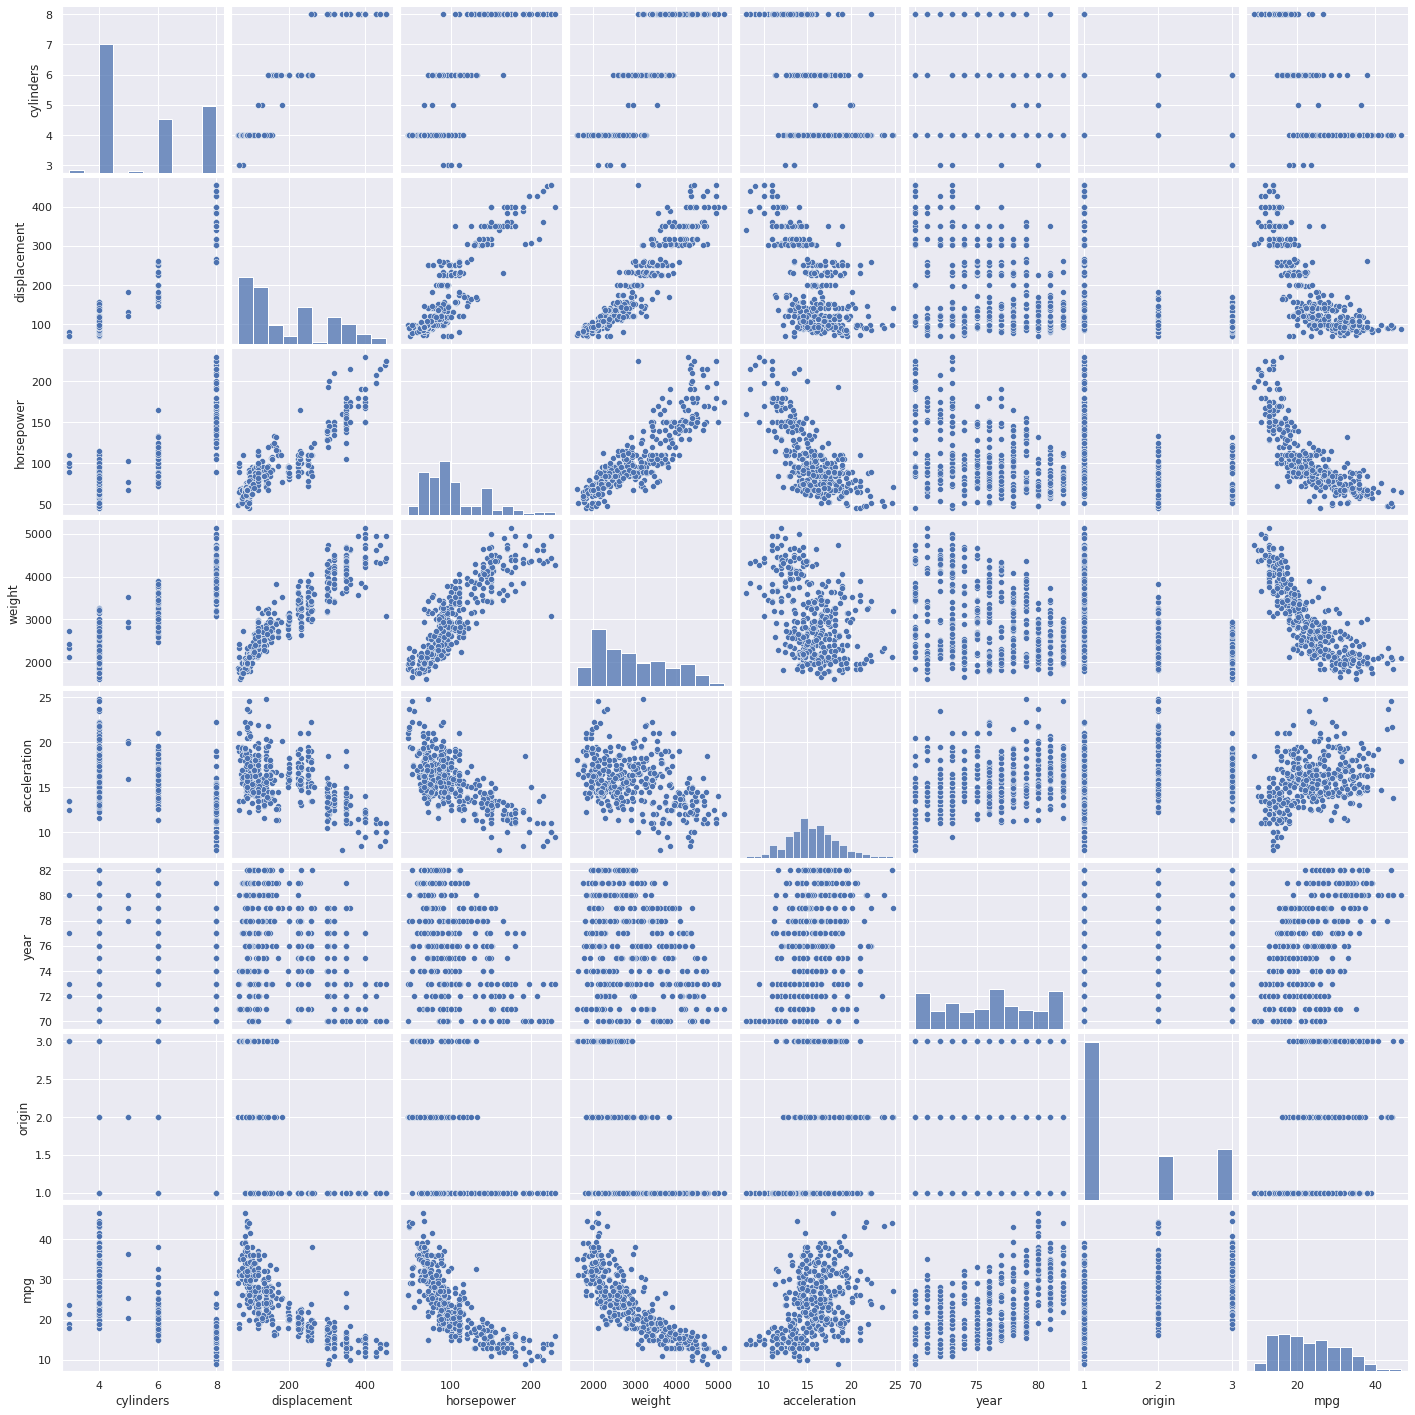

In [85]:
sns.pairplot(cars)

<AxesSubplot:>

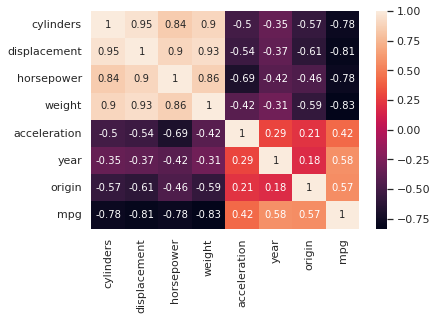

In [86]:
sns.heatmap(cars.corr(), annot=True)

In [87]:
model = sfa.ols(data=cars, formula='mpg ~ displacement + year').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     556.0
Date:                Tue, 17 May 2022   Prob (F-statistic):          8.61e-115
Time:                        16:58:41   Log-Likelihood:                -1096.5
No. Observations:                 392   AIC:                             2199.
Df Residuals:                     389   BIC:                             2211.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -19.3721      4.641     -4.174      0.000     -28.496     -10.248
displacement    -0.0510      0.002    -24.620      0.000      -0.055      -0.047
year             0.6941      0.059     11.792      0.000       0.578       0.810
==============================================================================
Omnibus:                       30.096   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.381
Skew:                           0.575   Prob(JB):                     1.03e-09
Kurtosis:                       4.101   Cond. No.                     5.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
model = sfa.ols(data=cars, formula='mpg ~ displacement + C(year)').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     108.5
Date:                Tue, 17 May 2022   Prob (F-statistic):          9.00e-119
Time:                        16:58:41   Log-Likelihood:                -1056.5
No. Observations:                 392   AIC:                             2141.
Df Residuals:                     378   BIC:                             2197.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        31.6875      0.874     36.244      0.000      29.968      33.407
C(year)[T.71]     0.0627      0.985      0.064      0.949      -1.874       1.999
C(year)[T.72]    -2.1119      0.975     -2.167      0.031      -4.028      -0.195
C(year)[T.73]    -1.8102      0.891     -2.031      0.043      -3.563      -0.058
C(year)[T.74]    -0.4298      1.009     -0.426      0.670      -2.414       1.555
C(year)[T.75]    -1.1974      0.962     -1.245      0.214      -3.089       0.694
C(year)[T.76]    -0.2755      0.937     -0.294      0.769      -2.118       1.567
C(year)[T.77]     1.2076      0.983      1.229      0.220      -0.725       3.140
C(year)[T.78]     1.2179      0.933      1.305      0.193      -0.617       3.052
C(year)[T.79]     3.6866      0.969      3.803      0.000       1.780       5.593
C(year)[T.80]     7.8899      1.028      7.672      0.000       5.868       9.912
C(year)[T.81]     5.2914      1.008      5.251      0.000       3.310       7.273
C(year)[T.82]     6.6860      0.997      6.707      0.000       4.726       8.646
displacement     -0.0497      0.002    -25.338      0.000      -0.054      -0.046
==============================================================================
Omnibus:                       19.626   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.542
Skew:                           0.327   Prob(JB):                     5.21e-08
Kurtosis:                       4.275   Cond. No.                     3.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
model = sfa.ols(data=cars, formula='mpg ~ displacement + year + horsepower').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     378.2
Date:                Tue, 17 May 2022   Prob (F-statistic):          8.94e-115
Time:                        16:58:42   Log-Likelihood:                -1093.2
No. Observations:                 392   AIC:                             2194.
Df Residuals:                     388   BIC:                             2210.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.6581      4.831     -3.241      0.001     -25.156      -6.160
displacement    -0.0413      0.004     -9.530      0.000      -0.050      -0.033
year             0.6626      0.060     11.094      0.000       0.545       0.780
horsepower      -0.0308      0.012     -2.560      0.011      -0.054      -0.007
==============================================================================
Omnibus:                       30.659   Durbin-Watson:                   1.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.211
Skew:                           0.632   Prob(JB):                     5.04e-09
Kurtosis:                       3.863   Cond. No.                     6.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
cars.sample()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg
287,8,351,138,3955,13.2,79,1,16.5


In [98]:
from itertools import combinations as itcombinations
from time import process_time


def multiply_combinations(df_no_pred_col, pred_col):
    multiplied_combinations = list()
    r = len(df_no_pred_col.columns)

    for i in range(1, r+1):
        combinations = list(itcombinations(df_no_pred_col.columns, i))

        for j in range(len(combinations)):
            formula = pred_col + ' ~ ' + '*'.join(combinations[j])
            multiplied_combinations.append(formula)

    return multiplied_combinations


def add_combinations(df_no_pred_col, pred_col):
    added_combinations = list()
    r = len(df_no_pred_col.columns)

    for i in range(1, r+1):
        combinations = list(itcombinations(df_no_pred_col.columns, i))

        for j in range(len(combinations)):
            formula = pred_col + ' ~ ' + ' + '.join(combinations[j])
            added_combinations.append(formula)
    
    return added_combinations


def model_result(train, test, pred_col, formula):
    model = sfa.ols(data=train, formula=formula).fit()
    predc = model.predict(test.drop(pred_col, axis=1))

    return np.sqrt(metrics.mean_squared_error(predc, test[pred_col])), model
    

def ols_formula(df, pred_col, formula_func):
    best_pred = 100
    best_formula = ''
    best_model = None

    df_no_pred_col = df.drop(pred_col, axis=1)

    train, test = train_test_split(df)

    combinations_after_func = formula_func(df_no_pred_col, pred_col)

    for cur_formula in combinations_after_func:
        result, model = model_result(train, test, pred_col, cur_formula)
        
        print(f'{cur_formula=}: {result=}')
        if result < best_pred:
            best_pred = result
            best_formula = cur_formula
            best_model = model

    print(f'{formula_func.__name__=}, {best_formula=}: {best_pred=}')
    # print(best_model.summary())

    return best_formula, best_pred, best_model

In [103]:
cars1 = cars.drop(['displacement', 'horsepower', 'origin', 'year', 'acceleration'], axis=1)
print(cars1.columns)

Index(['cylinders', 'weight', 'mpg'], dtype='object')


In [107]:
# start = process_time()
add_ols = ols_formula(cars1, 'mpg', add_combinations)
print(add_ols[2].summary())
# print('time:', process_time() - start)

cur_formula='mpg ~ cylinders': result=4.749033205583575
cur_formula='mpg ~ weight': result=4.599592806548849
cur_formula='mpg ~ cylinders + weight': result=4.531115320271808
formula_func.__name__='add_combinations', best_formula='mpg ~ cylinders + weight': best_pred=4.531115320271808
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     364.4
Date:                Tue, 17 May 2022   Prob (F-statistic):           5.73e-80
Time:                        17:06:39   Log-Likelihood:                -840.84
No. Observations:                 294   AIC:                             1688.
Df Residuals:                     291   BIC:                             1699.
Df Model:                           2                                         
Cova

In [105]:
# start = process_time()
mult_ols = ols_formula(cars1, 'mpg', multiply_combinations)
print(mult_ols[2].summary())
# print('time:', process_time() - start)

cur_formula='mpg ~ cylinders': result=5.488312586384635
cur_formula='mpg ~ weight': result=4.787813914323778
cur_formula='mpg ~ cylinders*weight': result=4.751233603485372
formula_func.__name__='multiply_combinations', best_formula='mpg ~ cylinders*weight': best_pred=4.751233603485372
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     270.1
Date:                Tue, 17 May 2022   Prob (F-statistic):           1.25e-83
Time:                        17:03:43   Log-Likelihood:                -820.09
No. Observations:                 294   AIC:                             1648.
Df Residuals:                     290   BIC:                             1663.
Df Model:                           3                                         
Cov

<AxesSubplot:>

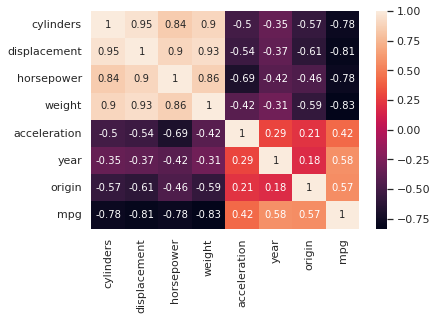

In [102]:
sns.heatmap(cars.corr(), annot=True)

In [93]:
# TODO crosswalidacja dla chetnych